# 1. Data Preprocessing: You are loading and cleaning the dataset (IMDB reviews), preparing the data for the model.

In [19]:
import pandas as pd
import numpy as np
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Load dataset

In [20]:
dataset = pd.read_csv('/content/IMDB Dataset.csv')


# Clean the text (remove HTML, punctuation, numbers, and convert to lowercase)

In [21]:
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.lower()  # Convert to lowercase
    return text

dataset['review'] = dataset['review'].apply(clean_text)


Explanation:
This section is preparing the IMDB dataset by loading it and cleaning the text reviews. You remove HTML tags, punctuation, numbers, and convert everything to lowercase for consistency.

# 2. Tokenizing and Padding the Sequences: Next, you will tokenize the text and pad sequences to make the input compatible with the BiLSTM model.


# Tokenize the text data

In [22]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(dataset['review'])

# Convert the texts to sequences

In [23]:
X = tokenizer.texts_to_sequences(dataset['review'])
X = pad_sequences(X, maxlen=100)

# Encode the labels (positive/negative reviews)


In [24]:
le = LabelEncoder()
y = le.fit_transform(dataset['sentiment'])

Explanation:

The text is tokenized (converted into sequences of integers) using a maximum vocabulary size of 5000. Sequences are then padded to ensure they all have the same length (100 words). The labels are encoded (0 or 1) for classification.

# 3. Splitting Data for Training and Testing: Before training, you need to split your data into training and testing sets.

# Split the data into training and test sets

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Explanation:
The dataset is split into 80% training and 20% testing data.

# 4. Building the BiLSTM Model: Now, the actual BiLSTM model is built and compiled with the relevant loss function and optimizer.

# Build a BiLSTM model

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=128, input_length=100),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Explanation:

This model uses an embedding layer to convert words into dense vectors of size 128, followed by a Bidirectional LSTM (BiLSTM) with 64 units. The output layer is a single neuron with a sigmoid activation for binary classification.

# 5. Training the Model: You then train the model and store the training history in the history variable.

# Train the model

In [27]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 165s 258ms/step - accuracy: 0.7430 - loss: 0.4943 - val_accuracy: 0.8522 - val_loss: 0.3326
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 256ms/step - accuracy: 0.8823 - loss: 0.2853 - val_accuracy: 0.8554 - val_loss: 0.3352
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 161s 257ms/step - accuracy: 0.9102 - loss: 0.2231 - val_accuracy: 0.8604 - val_loss: 0.3529
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 256ms/step - accuracy: 0.9399 - loss: 0.1615 - val_accuracy: 0.8517 - val_loss: 0.3844
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 257ms/step - accuracy: 0.9573 - loss: 0.1206 - val_accuracy: 0.8489 - val_loss: 0.4559


Explanation:

The model is trained for 5 epochs with a batch size of 64. The training and validation accuracies are tracked using the history object.

# 6. Plotting Training and Validation Accuracy Graphs: Here is where you plot two separate graphs for training and validation accuracy:

In [28]:
import matplotlib.pyplot as plt

# Plot Training Accuracy

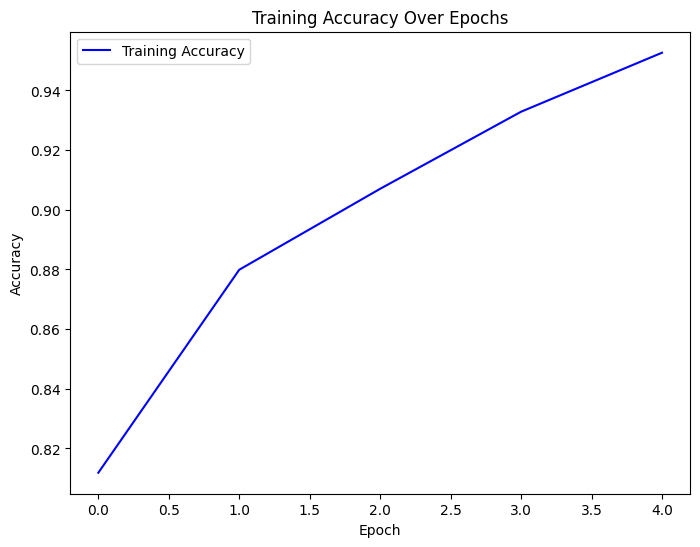

In [44]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.title('Training Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot Validation Accuracy

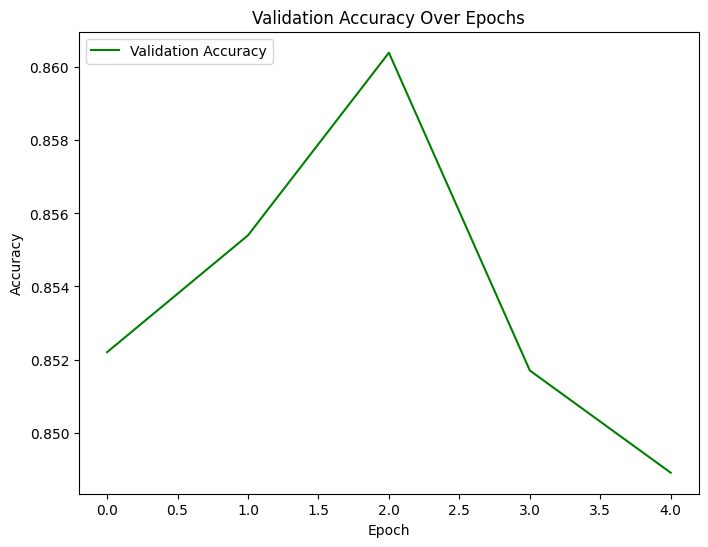

In [45]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Validation Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

Explanation:

The first graph plots training accuracy over the epochs using the history.history['accuracy'] values.
The second graph plots validation accuracy over the epochs using the history.history['val_accuracy'] values.



Demonstration of the Output:

Training Accuracy Graph: You will see a blue line representing how the training accuracy improves (or changes) over the epochs.
Validation Accuracy Graph: The green line will show how the validation accuracy changes over the epochs, allowing you to evaluate the model's performance on unseen data.

# 7. Evaluate the Model

# Model Accuracy

In [31]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.8492 - loss: 0.4551
Test Accuracy: 84.89%


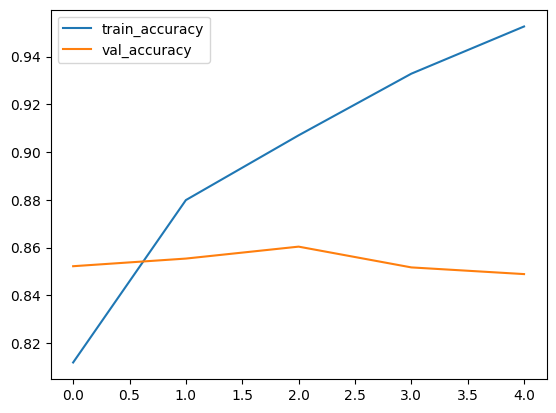

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()


In [33]:
model.save('bilstm_imdb_model.h5')
model = tf.keras.models.load_model('bilstm_imdb_model.h5')


# Predictive Analytics on Negative / Positive Output

In [34]:
def predictive_system(review):
    # Clean the review just like during training
    review = clean_text(review)

    # Convert the review to sequences and pad it
    sequences = tokenizer.texts_to_sequences([review])
    padded_sequence = pad_sequences(sequences, maxlen=200)

    # Make a prediction
    prediction = model.predict(padded_sequence)

    # Determine the sentiment
    sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
    return sentiment


# Reviewing Outputs

# Positive Output

In [35]:
result = predictive_system("This movie was fantastic and amazing")
print(f"The sentiment is: {result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
The sentiment is: positive


# Negative Output

In [36]:
result = predictive_system("This movie was worst experirence i have ever had")
print(f"The sentiment is: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
The sentiment is: negative


In [46]:
result = predictive_system("Movie was so much Dragging")
print(f"The sentiment is: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
The sentiment is: negative


In [47]:
result = predictive_system("It was hit my heart")
print(f"The sentiment is: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
The sentiment is: positive
